<a href="https://colab.research.google.com/github/anjuvaishnav1038/DATASCIENCE-R/blob/main/house_price_r.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
df<-read.csv("/content/House_Price.csv",header=TRUE)

In [ ]:
str(df)

'data.frame':	506 obs. of  24 variables:
 $ price                  : num  24 21.6 34.7 33.4 36.2 28.7 22.9 22.1 16.5 18.9 ...
 $ crime_rate             : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ resid_area             : num  32.3 37.1 37.1 32.2 32.2 ...
 $ air_qual               : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ room_num               : num  6.58 6.42 7.18 7 7.15 ...
 $ age                    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dist1                  : num  4.35 4.99 5.03 6.21 6.16 6.22 5.87 6.04 6.18 6.67 ...
 $ dist2                  : num  3.81 4.7 4.86 5.93 5.86 5.8 5.47 5.85 5.85 6.55 ...
 $ dist3                  : num  4.18 5.12 5.01 6.16 6.37 6.23 5.7 6.25 6.3 6.85 ...
 $ dist4                  : num  4.01 5.06 4.97 5.96 5.86 5.99 5.2 5.66 6 6.29 ...
 $ teachers               : num  24.7 22.2 22.2 21.3 21.3 21.3 24.8 24.8 24.8 24.8 ...
 $ poor_prop              : num  4.98 9.14 4.03 2.94 5.33 ...
 $ a

     price         crime_rate         resid_area       air_qual     
 Min.   : 5.00   Min.   : 0.00632   Min.   :30.46   Min.   :0.3850  
 1st Qu.:17.02   1st Qu.: 0.08205   1st Qu.:35.19   1st Qu.:0.4490  
 Median :21.20   Median : 0.25651   Median :39.69   Median :0.5380  
 Mean   :22.53   Mean   : 3.61352   Mean   :41.14   Mean   :0.5547  
 3rd Qu.:25.00   3rd Qu.: 3.67708   3rd Qu.:48.10   3rd Qu.:0.6240  
 Max.   :50.00   Max.   :88.97620   Max.   :57.74   Max.   :0.8710  
                                                                    
    room_num          age             dist1            dist2       
 Min.   :3.561   Min.   :  2.90   Min.   : 1.130   Min.   : 0.920  
 1st Qu.:5.886   1st Qu.: 45.02   1st Qu.: 2.270   1st Qu.: 1.940  
 Median :6.208   Median : 77.50   Median : 3.385   Median : 3.010  
 Mean   :6.285   Mean   : 68.57   Mean   : 3.972   Mean   : 3.629  
 3rd Qu.:6.623   3rd Qu.: 94.08   3rd Qu.: 5.367   3rd Qu.: 4.992  
 Max.   :8.780   Max.   :100.00   Max.  

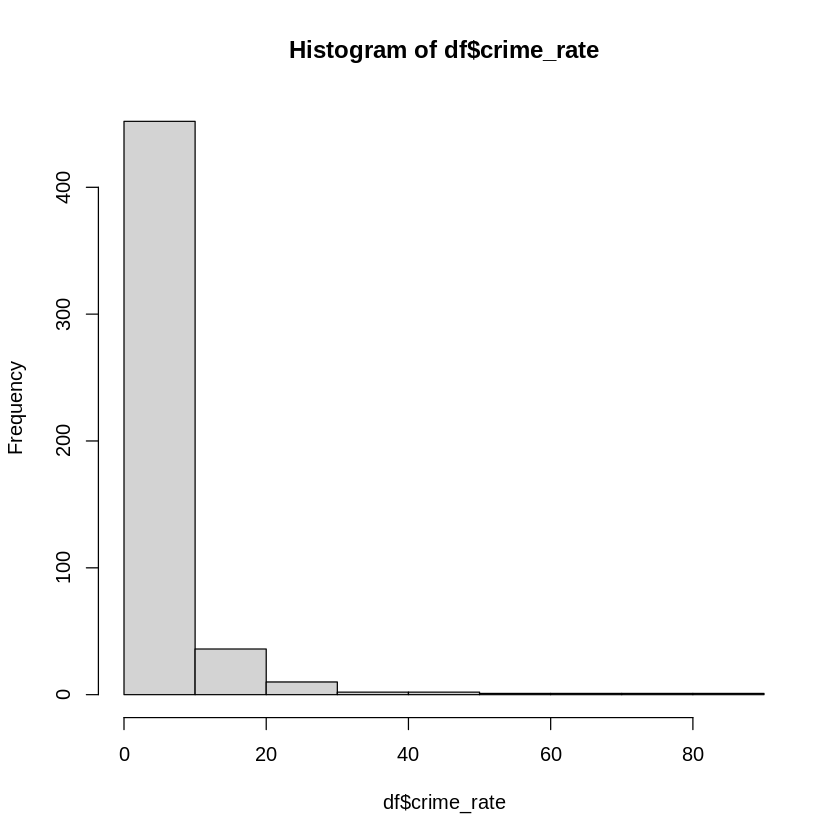

In [ ]:
summary(df)
hist(df$crime_rate)

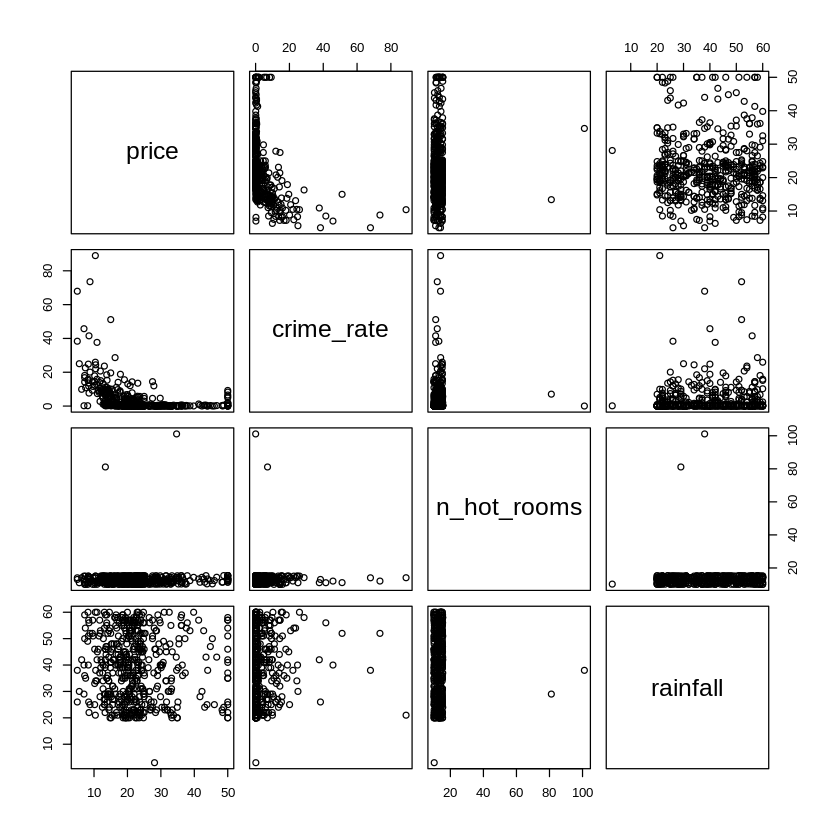

In [ ]:
pairs(~price+crime_rate+n_hot_rooms+rainfall,data=df)

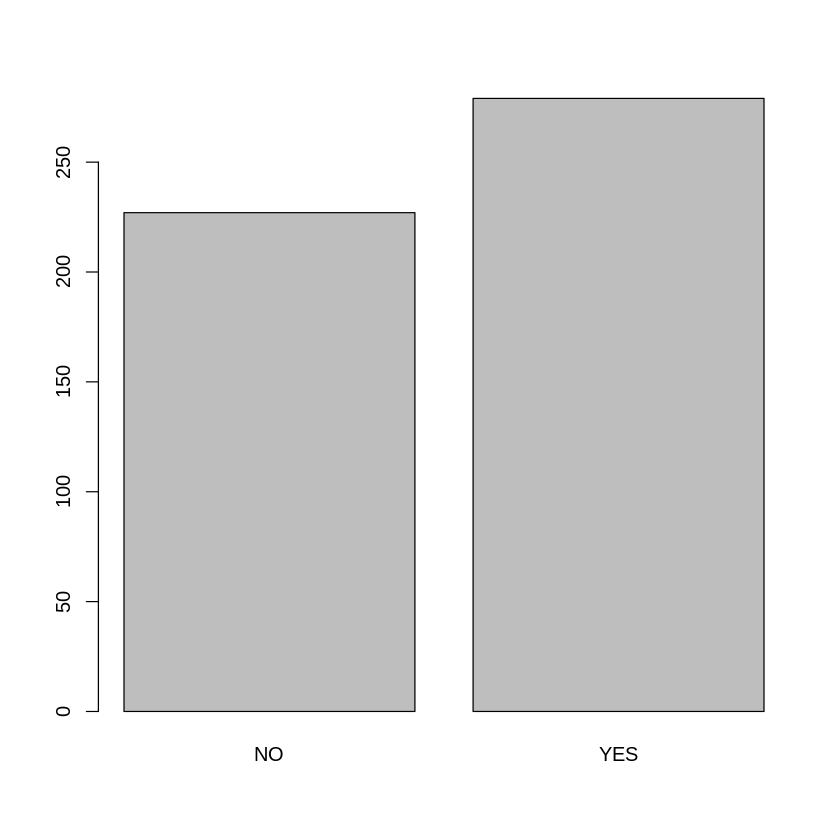

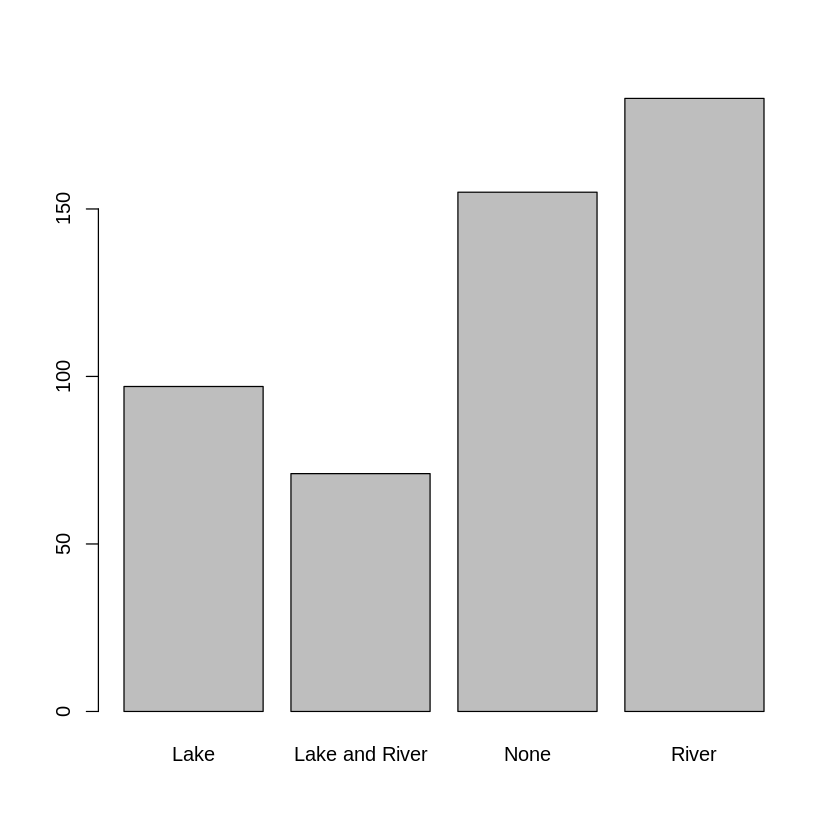

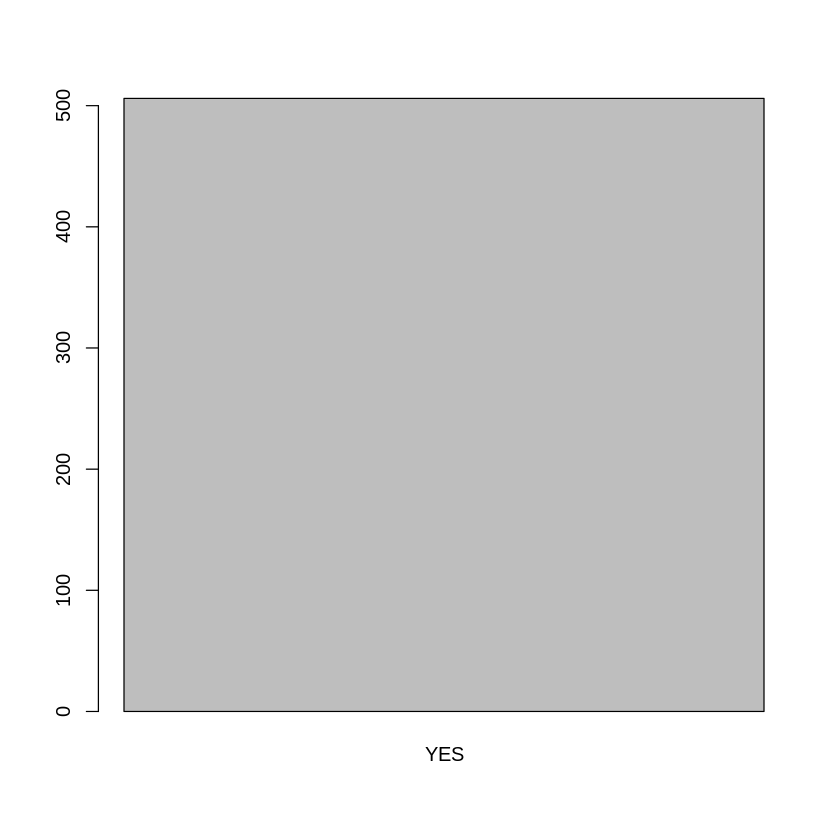

In [ ]:
barplot(table(df$airport))
barplot(table(df$waterbody))
barplot(table(df$bus_ter))

In [ ]:
#n_hot_rooms and rainfall has outliers
# n_hos_beds has missing values
# bus_term is a useless variable
#crime_rate has some other functional relationships
quantile(df$n_hot_rooms,0.99)

99% 
15.39952

In [ ]:
uv=3*quantile(df$n_hot_rooms,0.99)

In [ ]:
df$n_hot_rooms[df$n_hot_rooms>uv]<-uv

In [ ]:
summary(df$n_hot_rooms)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  10.06   11.19   12.72   12.86   14.17   46.20 

In [ ]:
lv=0.3*quantile(df$rainfall,0.01)
df$rainfall[df$rainfall<lv]<-lv
summary(df$rainfall)
mean(df$n_hos_beds)
mean(df$n_hos_beds,na.rm=TRUE)#rm is used for removing mean values
which(is.na(df$n_hos_beds))#to find out which position in the n_hos_beds is na

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   6.00   28.00   39.00   39.19   50.00   60.00 

[1] NA

[1] 7.899767

[1]  51 113 216 261 360 404 417 497

In [ ]:
df$n_hos_beds[is.na(df$n_hos_beds)]<-mean(df$n_hos_beds,na.rm=TRUE)#missing values are replaced by mean
summary(df$n_hos_beds)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  5.268   6.659   7.963   7.900   9.076  10.876 

integer(0)

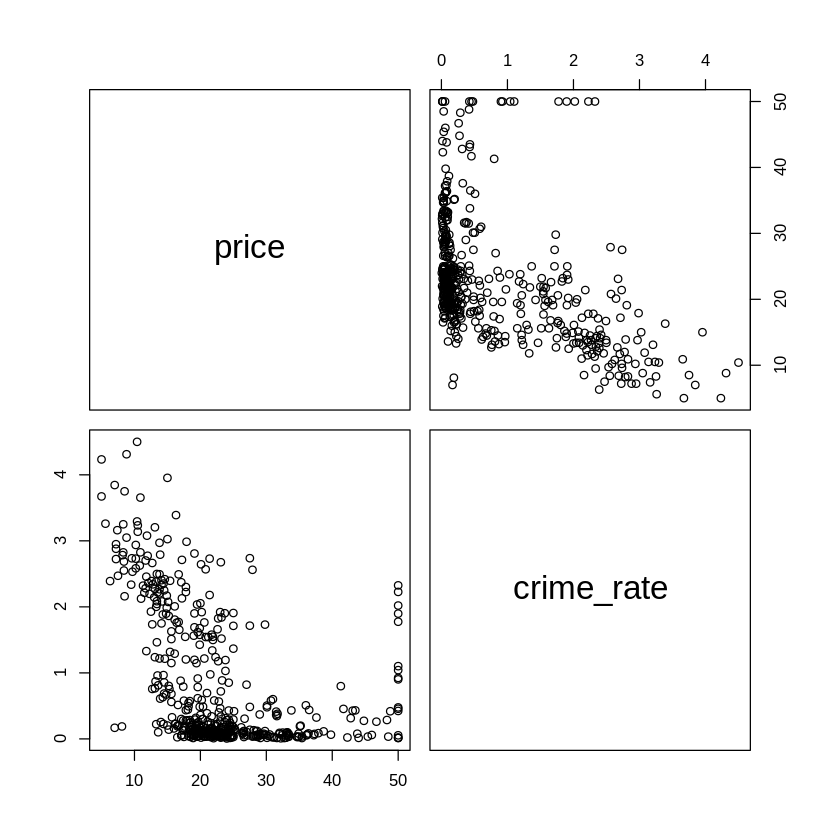

In [ ]:
which(is.na(df$n_hos_beds))
pairs(~price+crime_rate,data=df)

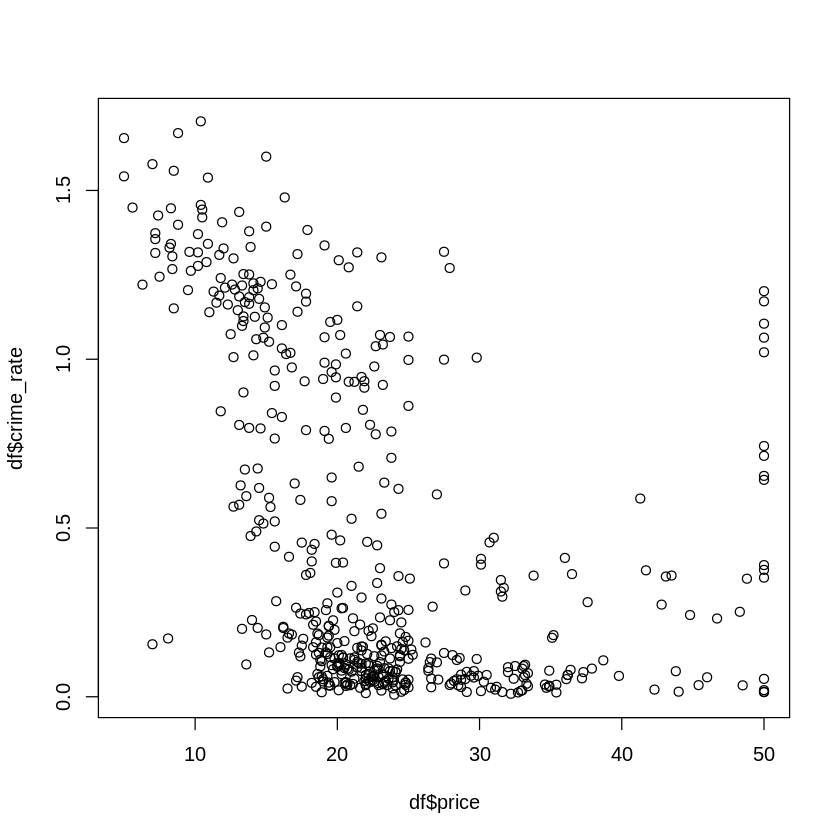

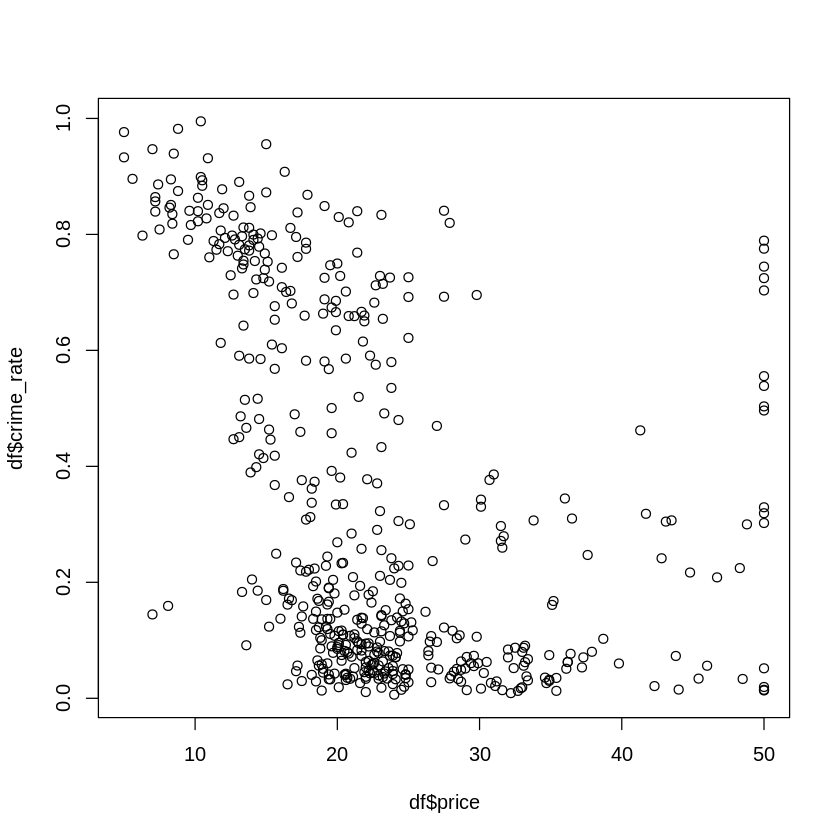

In [ ]:
plot(df$price,df$crime_rate)
df$crime_rate<-log(1+df$crime_rate)
plot(df$price,df$crime_rate)

In [ ]:
df$dist_avg<-mean(df$dist1+df$dist2+df$dist3+df$dist4)

In [ ]:
df<-df[,-7:-10]
df<-df[,-9:-10]
df<-df[,-12]
df<-df[,-16]
cor(df)
round(cor(df),2)
df<-df[,-16]

,price,crime_rate,resid_area,air_qual,room_num,age,n_hot_rooms,waterbodyLake.and.River,rainfall,dist_avg
price,1.00000000,-0.44240251,-0.484754379,-0.429300219,0.69630379,-0.377998896,0.017007130,-0.037497000,-0.04720035,NA
crime_rate,-0.44240251,1.00000000,0.720661406,0.790673948,-0.28582659,0.632467997,0.048331052,0.011447959,0.07931430,NA
resid_area,-0.48475438,0.72066141,1.000000000,0.763651447,-0.39167585,0.644778511,-0.003760916,0.051648836,0.05584549,NA
air_qual,-0.42930022,0.79067395,0.763651447,1.000000000,-0.30218819,0.731470104,0.007238427,0.013849087,0.09195593,NA
room_num,0.69630379,-0.28582659,-0.391675853,-0.302188188,1.00000000,-0.240264931,0.014582669,0.010554415,-0.06471805,NA
age,-0.37799890,0.63246800,0.644778511,0.731470104,-0.24026493,1.000000000,0.013918222,-0.004354081,0.07468433,NA
n_hot_rooms,0.01700713,0.04833105,-0.003760916,0.007238427,0.01458267,0.013918222,1.000000000,0.014754998,0.01486939,NA
waterbodyLake.and.River,-0.03749700,0.01144796,0.051648836,0.013849087,0.01055441,-0.004354081,0.014754998,1.000000000,0.10923352,NA
rainfall,-0.04720035,0.07931430,0.055845495,0.091955932,-0.06471805,0.074684329,0.014869392,0.109233521,1.00000000,NA
dist_avg,NA,NA,NA,NA,NA,NA,NA,NA,NA,1


,price,crime_rate,resid_area,air_qual,room_num,age,n_hot_rooms,waterbodyLake.and.River,rainfall,dist_avg
price,1.00,-0.44,-0.48,-0.43,0.70,-0.38,0.02,-0.04,-0.05,NA
crime_rate,-0.44,1.00,0.72,0.79,-0.29,0.63,0.05,0.01,0.08,NA
resid_area,-0.48,0.72,1.00,0.76,-0.39,0.64,0.00,0.05,0.06,NA
air_qual,-0.43,0.79,0.76,1.00,-0.30,0.73,0.01,0.01,0.09,NA
room_num,0.70,-0.29,-0.39,-0.30,1.00,-0.24,0.01,0.01,-0.06,NA
age,-0.38,0.63,0.64,0.73,-0.24,1.00,0.01,0.00,0.07,NA
n_hot_rooms,0.02,0.05,0.00,0.01,0.01,0.01,1.00,0.01,0.01,NA
waterbodyLake.and.River,-0.04,0.01,0.05,0.01,0.01,0.00,0.01,1.00,0.11,NA
rainfall,-0.05,0.08,0.06,0.09,-0.06,0.07,0.01,0.11,1.00,NA
dist_avg,NA,NA,NA,NA,NA,NA,NA,NA,NA,1



Call:
lm(formula = price ~ room_num, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-23.336  -2.425   0.093   2.918  39.434 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -34.6592     2.6421  -13.12   <2e-16 ***
room_num      9.0997     0.4178   21.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6.597 on 504 degrees of freedom
Multiple R-squared:  0.4848,	Adjusted R-squared:  0.4838 
F-statistic: 474.3 on 1 and 504 DF,  p-value: < 2.2e-16


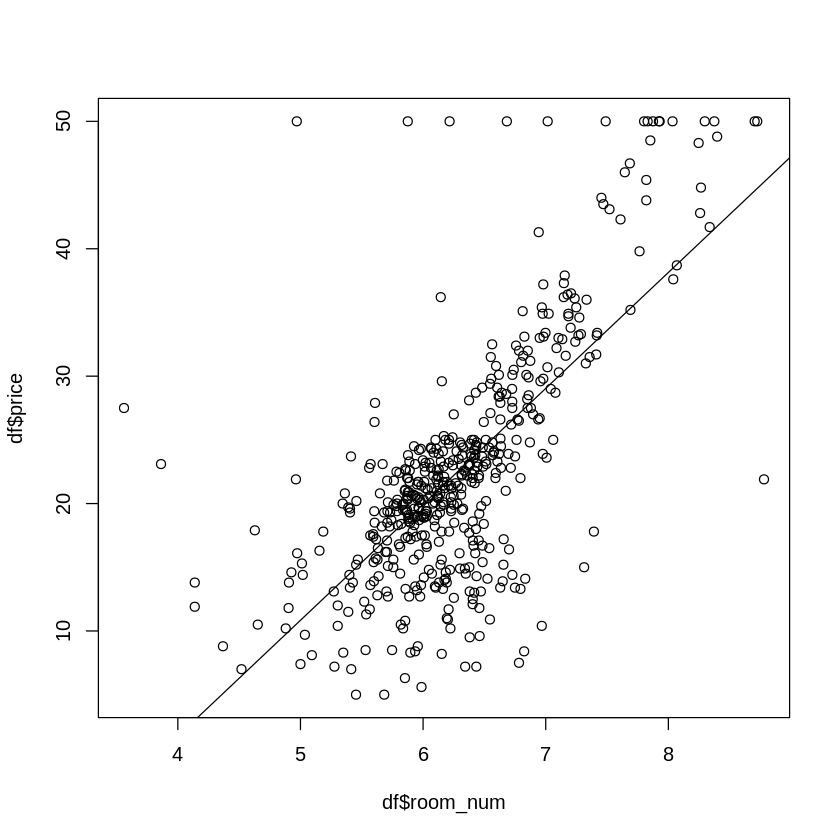

In [ ]:
simple_model<-lm(price~room_num,data=df)
summary(simple_model)
plot(df$room_num,df$price)
abline(simple_model)


In [ ]:
library(caTools)

In [ ]:
set.seed(0)
split=sample.split(df,SplitRatio=0.8)

test_set=subset(df,split==FALSE)

In [ ]:
training_set=subset(df,split==TRUE)
training_set

,price,crime_rate,resid_area,air_qual,room_num,age,n_hot_rooms,waterbodyLake.and.River,rainfall,dist_avg
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1,24.0,0.006260711,32.31,0.538,6.575,65.2,11.19200,0,23,NaN
2,21.6,0.026239848,37.07,0.469,6.421,78.9,12.17280,0,42,NaN
3,34.7,0.026221381,37.07,0.469,7.185,61.1,46.19856,0,38,NaN
4,33.4,0.030878531,32.18,0.458,6.998,45.8,11.26720,0,45,NaN
6,28.7,0.028576663,32.18,0.458,6.430,58.7,14.22960,0,53,NaN
7,22.9,0.078088475,37.87,0.524,6.012,66.6,12.18320,0,41,NaN
9,16.5,0.161552697,37.87,0.524,5.631,100.0,12.13200,0,55,NaN
10,18.9,0.136158271,37.87,0.524,6.004,85.9,14.15120,0,45,NaN
11,15.0,0.169485027,37.87,0.524,6.377,94.3,11.12000,0,29,NaN


In [ ]:
test_set=subset(df,split==FALSE)
test_set

,price,crime_rate,resid_area,air_qual,room_num,age,n_hot_rooms,waterbodyLake.and.River,rainfall,dist_avg
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
5,36.2,0.06263274,32.18,0.4580,7.147,54.2,11.2896,0,55,NaN
8,22.1,0.11924226,37.87,0.5240,6.172,96.1,12.1768,0,56,NaN
15,18.2,0.33725045,38.14,0.5380,6.096,84.5,13.1456,0,49,NaN
18,17.5,0.37622359,38.14,0.5380,5.990,81.7,11.1400,0,56,NaN
25,15.6,0.36778730,38.14,0.5380,5.924,94.1,13.1248,0,27,NaN
28,14.8,0.41428805,38.14,0.5380,6.047,88.8,13.1184,0,20,NaN
35,13.5,0.51471638,38.14,0.5380,6.096,96.9,11.1080,0,40,NaN
38,21.0,0.07163538,35.96,0.4990,5.850,41.5,10.1680,0,21,NaN
45,21.2,0.10391554,36.91,0.4480,6.069,40.0,12.1696,0,53,NaN
